In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#Proses Baca Dataset
covid = pd.read_table("Covid_dataset_baru.csv", delimiter=",")
covid.head(273)

,umur,sakit_kepala,anosmia,demam,batuk,kehilangan_nafsu_makan,suara_serak,sakit_tenggorokan,nyeri_dada,lemas,kebingungan,nyeri_otot,sesak_nafas,diare,sakit_perut,tanpa_gejala,komorbid,status
0,21,0,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,1
1,20,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
2,53,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1
3,27,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1
4,61,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,46,1,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1
268,12,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,1
269,32,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1
270,25,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1


In [ ]:
covid_df = pd.DataFrame(covid)
covid_df

,umur,sakit_kepala,anosmia,demam,batuk,kehilangan_nafsu_makan,suara_serak,sakit_tenggorokan,nyeri_dada,lemas,kebingungan,nyeri_otot,sesak_nafas,diare,sakit_perut,tanpa_gejala,komorbid,status
0,21,0,1,0,1,1,1,0,1,1,0,1,0,0,0,0,0,1
1,20,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
2,53,1,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,1
3,27,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1
4,61,0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,46,1,0,1,1,1,0,0,1,1,0,0,1,0,0,0,0,1
268,12,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,1
269,32,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1
270,25,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,1


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   umur                    272 non-null    int64
 1   sakit_kepala            272 non-null    int64
 2   anosmia                 272 non-null    int64
 3   demam                   272 non-null    int64
 4   batuk                   272 non-null    int64
 5   kehilangan_nafsu_makan  272 non-null    int64
 6   suara_serak             272 non-null    int64
 7   sakit_tenggorokan       272 non-null    int64
 8   nyeri_dada              272 non-null    int64
 9   lemas                   272 non-null    int64
 10  kebingungan             272 non-null    int64
 11  nyeri_otot              272 non-null    int64
 12  sesak_nafas             272 non-null    int64
 13  diare                   272 non-null    int64
 14  sakit_perut             272 non-null    int64
 15  tanpa_gejala           

In [ ]:
x = covid[["umur","sakit_kepala","anosmia","demam","batuk","kehilangan_nafsu_makan", 
           "suara_serak","nyeri_dada","lemas","kebingungan","nyeri_otot","sesak_nafas",
           "diare","sakit_perut","tanpa_gejala","komorbid"]] .values  #.astype(float)
x[0:5]

array([[21,  0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  0],
       [20,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1],
       [53,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  0,  0,  1],
       [27,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [61,  0,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  0,  0,  1]])

In [ ]:
y = covid['status'].values
y[0:5]

array([1, 1, 1, 1, 0])

In [ ]:
#Proses Split Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=9)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (244, 16) (244,)
Test set: (28, 16) (28,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict (x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
import sklearn.metrics as metrics
Ks = 5
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.92857143, 0.92857143, 0.96428571, 0.96428571])

In [ ]:
#Akurasi
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.930327868852459
Test set Accuracy:  0.9642857142857143


In [ ]:
x_train = np.array(covid_df[['umur', 'sakit_kepala', 'anosmia', 'demam', 'batuk', 'kehilangan_nafsu_makan', 'suara_serak', 'sakit_tenggorokan ', 'nyeri_dada', 'lemas', 'kebingungan', 'nyeri_otot', 'sesak_nafas', 'diare', 'sakit_perut', 'tanpa_gejala', 'komorbid', 'status']])
y_train = np.array(covid_df['status'])

print(f'X_train:\n{x_train}\n')
print(f'Y_train:\n{y_train}')

X_train:
[[21  0  1 ...  0  0  1]
 [20  1  0 ...  0  1  1]
 [53  1  1 ...  0  1  1]
 ...
 [32  0  1 ...  0  0  1]
 [25  0  1 ...  0  0  1]
 [24  0  0 ...  0  0  1]]

Y_train:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
knn.predict_proba(x_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print (confusion_matrix(y_test, y_pred))

[[ 0  1]
 [ 0 27]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        27

    accuracy                           0.96        28
   macro avg       0.48      0.50      0.49        28
weighted avg       0.93      0.96      0.95        28



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

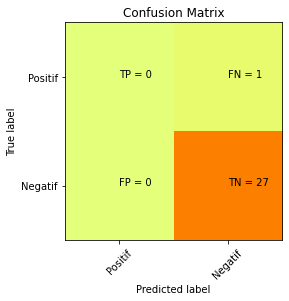

In [ ]:
#show confusion matrix results
cm=confusion_matrix(y_test,y_pred.round())
#print(cm)
from matplotlib.colors import ListedColormap

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['Positif','Negatif']
plt.title('Confusion Matrix')
plt.ylabel("True label")
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TP','FN'],['FP','TN']]

for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size=0.2, random_state=8)
print ('Train set:', x_train.shape, y_train.shape)
print ('Train set:', x_test.shape, y_test.shape)

Train set: (217, 16) (217,)
Train set: (55, 16) (55,)


In [ ]:
k = 7
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict (x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
import sklearn.metrics as metrics
Ks = 6
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.8       , 0.78181818, 0.90909091, 0.87272727, 0.90909091])

In [ ]:
x_train = np.array(covid_df[['umur', 'sakit_kepala', 'anosmia', 'demam', 'batuk', 'kehilangan_nafsu_makan', 'suara_serak', 'sakit_tenggorokan ', 'nyeri_dada', 'lemas', 'kebingungan', 'nyeri_otot', 'sesak_nafas', 'diare', 'sakit_perut', 'tanpa_gejala', 'komorbid', 'status']])
y_train = np.array(covid_df['status'])

print(f'X_train:\n{x_train}\n')
print(f'Y_train:\n{y_train}')

X_train:
[[21  0  1 ...  0  0  1]
 [20  1  0 ...  0  1  1]
 [53  1  1 ...  0  1  1]
 ...
 [32  0  1 ...  0  0  1]
 [25  0  1 ...  0  0  1]
 [24  0  0 ...  0  0  1]]

Y_train:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
knn.predict_proba(x_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.14285714, 0.85714286],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.28571429, 0.71428571],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.14285714, 0.85714286],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [ ]:
print (confusion_matrix(y_test, y_pred))

[[ 0  5]
 [ 0 50]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.91      1.00      0.95        50

    accuracy                           0.91        55
   macro avg       0.45      0.50      0.48        55
weighted avg       0.83      0.91      0.87        55



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


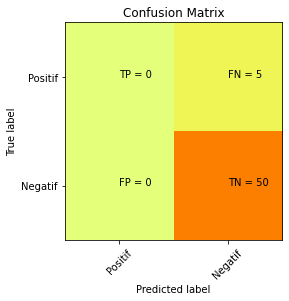

In [ ]:
#show confusion matrix results
cm=confusion_matrix(y_test,y_pred.round())
#print(cm)
from matplotlib.colors import ListedColormap

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['Positif','Negatif']
plt.title('Confusion Matrix')
plt.ylabel("True label")
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TP','FN'],['FP','TN']]

for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size=0.3, random_state=7)
print ('Train set:', x_train.shape, y_train.shape)
print ('Train set:', x_test.shape, y_test.shape)

Train set: (190, 16) (190,)
Train set: (82, 16) (82,)


In [ ]:
k = 3
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict (x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
Ks = 8
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7804878 , 0.76829268, 0.82926829, 0.84146341, 0.82926829,
       0.82926829, 0.82926829])

In [ ]:
x_train = np.array(covid_df[['umur', 'sakit_kepala', 'anosmia', 'demam', 'batuk', 'kehilangan_nafsu_makan', 'suara_serak', 'sakit_tenggorokan ', 'nyeri_dada', 'lemas', 'kebingungan', 'nyeri_otot', 'sesak_nafas', 'diare', 'sakit_perut', 'tanpa_gejala', 'komorbid', 'status']])
y_train = np.array(covid_df['status'])

print(f'X_train:\n{x_train}\n')
print(f'Y_train:\n{y_train}')

X_train:
[[21  0  1 ...  0  0  1]
 [20  1  0 ...  0  1  1]
 [53  1  1 ...  0  1  1]
 ...
 [32  0  1 ...  0  0  1]
 [25  0  1 ...  0  0  1]
 [24  0  0 ...  0  0  1]]

Y_train:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
knn.predict_proba(x_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [ ]:
print (confusion_matrix(y_test, y_pred))

[[ 1 13]
 [ 1 67]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12        14
           1       0.84      0.99      0.91        68

    accuracy                           0.83        82
   macro avg       0.67      0.53      0.52        82
weighted avg       0.78      0.83      0.77        82



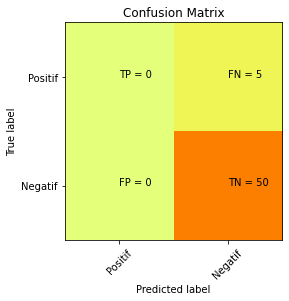

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['Positif','Negatif']
plt.title('Confusion Matrix')
plt.ylabel("True label")
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TP','FN'],['FP','TN']]

for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size=0.4, random_state=6)
print ('Train set:', x_train.shape, y_train.shape)
print ('Train set:', x_test.shape, y_test.shape)

Train set: (163, 16) (163,)
Train set: (109, 16) (109,)


In [ ]:
k = 12
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict (x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.88990826, 0.85321101, 0.87155963, 0.88073394, 0.88073394,
       0.88073394, 0.88990826, 0.88990826, 0.88073394, 0.88073394])

In [ ]:
x_train = np.array(covid_df[['umur', 'sakit_kepala', 'anosmia', 'demam', 'batuk', 'kehilangan_nafsu_makan', 'suara_serak', 'sakit_tenggorokan ', 'nyeri_dada', 'lemas', 'kebingungan', 'nyeri_otot', 'sesak_nafas', 'diare', 'sakit_perut', 'tanpa_gejala', 'komorbid', 'status']])
y_train = np.array(covid_df['status'])

print(f'X_train:\n{x_train}\n')
print(f'Y_train:\n{y_train}')

X_train:
[[21  0  1 ...  0  0  1]
 [20  1  0 ...  0  1  1]
 [53  1  1 ...  0  1  1]
 ...
 [32  0  1 ...  0  0  1]
 [25  0  1 ...  0  0  1]
 [24  0  0 ...  0  0  1]]

Y_train:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
knn.predict_proba(x_test)

array([[0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08333333, 0.91666667],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.16666667, 0.83333333],
       [0.25      , 0.75      ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.

In [ ]:
print (confusion_matrix(y_test, y_pred))

[[ 0 13]
 [ 0 96]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.88      1.00      0.94        96

    accuracy                           0.88       109
   macro avg       0.44      0.50      0.47       109
weighted avg       0.78      0.88      0.82       109



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


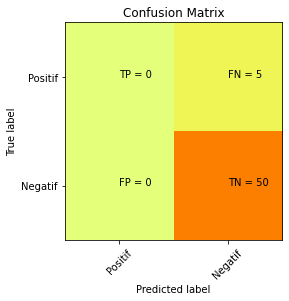

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['Positif','Negatif']
plt.title('Confusion Matrix')
plt.ylabel("True label")
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TP','FN'],['FP','TN']]

for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split ( x, y, test_size=0.5, random_state=5)
print ('Train set:', x_train.shape, y_train.shape)
print ('Train set:', x_test.shape, y_test.shape)

Train set: (136, 16) (136,)
Train set: (136, 16) (136,)


In [ ]:
k = 2
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict (x_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [ ]:
Ks = 3
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.85294118, 0.81617647])

In [ ]:
x_train = np.array(covid_df[['umur', 'sakit_kepala', 'anosmia', 'demam', 'batuk', 'kehilangan_nafsu_makan', 'suara_serak', 'sakit_tenggorokan ', 'nyeri_dada', 'lemas', 'kebingungan', 'nyeri_otot', 'sesak_nafas', 'diare', 'sakit_perut', 'tanpa_gejala', 'komorbid', 'status']])
y_train = np.array(covid_df['status'])

print(f'X_train:\n{x_train}\n')
print(f'Y_train:\n{y_train}')

X_train:
[[21  0  1 ...  0  0  1]
 [20  1  0 ...  0  1  1]
 [53  1  1 ...  0  1  1]
 ...
 [32  0  1 ...  0  0  1]
 [25  0  1 ...  0  0  1]
 [24  0  0 ...  0  0  1]]

Y_train:
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
knn.predict_proba(x_test)

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.5, 0.5],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. ,

In [ ]:
print (confusion_matrix(y_test, y_pred))

[[  3  11]
 [ 14 108]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.21      0.19        14
           1       0.91      0.89      0.90       122

    accuracy                           0.82       136
   macro avg       0.54      0.55      0.54       136
weighted avg       0.83      0.82      0.82       136



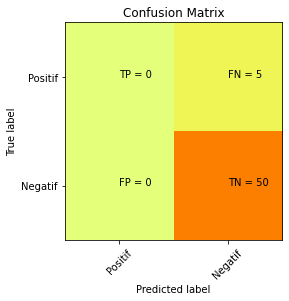

In [ ]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames=['Positif','Negatif']
plt.title('Confusion Matrix')
plt.ylabel("True label")
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s=[['TP','FN'],['FP','TN']]

for i in range(2):
  for j in range(2):
    plt.text(j,i,str(s[i][j])+" = "+str(cm[i][j]))

plt.show()

In [ ]:
#proses Input Data
Umur = 22
Sakit_Kepala = 1
Anosmia = 1
Demam = 1
Batuk = 1
Kehilangan_Nafsu_Makan = 1
Suara_Serak = 1
Sakit_Tenggorokan = 0
Sesak_Nafas = 1
Nyeri_Dada = 1
Kebingungan = 1
Lemas =1 
Nyeri_Otot = 0
Diare = 0
Sakit_Perut = 0
Tanpa_Gejala = 0
Penyakit_Bawaan = 1
x_new = np.array([Umur,Sakit_Kepala,Anosmia,Demam,Batuk,Kehilangan_Nafsu_Makan,Suara_Serak,Sakit_Tenggorokan,Sesak_Nafas,Nyeri_Dada,Kebingungan,Lemas,Nyeri_Otot,Diare,Sakit_Perut,Tanpa_Gejala,Penyakit_Bawaan]).reshape(1, -1)
x_new

array([[22,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0,
         1]])

In [ ]:
test = np.array([22,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  0,  0,  0])
output_array = np.reshape(test, (1, -1))
y_new = knn.predict(output_array)
y_new

array([1])

In [ ]:
import pickle

In [ ]:
pickle.dump(y_pred, open('knn.pkl', 'wb'))

In [ ]:
pickle.dump(y_pred, open('knn.pkl', 'wb'))

In [ ]:
knn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)